In [17]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import simpson as integrator

$$
u'' - 2u' - u=-2xe^{x}
$$
$$
u(0)=0 
$$
$$
u(1)=e 
$$
$$
u(x) = xe^x
$$

In [18]:
a0, b0 = 0, 1
gamma1, gamma2 = 0, np.e
N = 1000

In [19]:
h = (b0 - a0) / N

In [20]:
X = np.linspace(a0, b0, N + 1)

In [21]:
def p(x):
    return -2

def q(x):
    return -1

def f0(x):
    return -2 * x * np.exp(x)

In [22]:
def v(x):
    return gamma1 + (gamma2 - gamma1) * (x - a0) / (b0 - a0)

In [23]:
def f(x):
    return f0(x) - p(x) * (gamma2 - gamma1) / (b0 - a0) - q(x) * v(x)

In [24]:
N_int = 50

In [25]:
def A(i, j):
    x1 = np.linspace(X[i - 1], X[i], N_int)
    x2 = np.linspace(X[i], X[i + 1], N_int)

    if i == j:
        return (
            -2 / h + (
                integrator(
                    p(x1) * (x1 - X[i - 1]) + q(x1) * (x1 - X[i - 1]) ** 2, x=x1
                ) + integrator(
                    p(x2) * (x2 - X[i + 1]) + q(x2) * (x2 - X[i + 1]) ** 2, x=x2
                )
            ) / (h ** 2)
        )
    elif (j == i + 1):
        return (
            1 / h - (
                integrator(
                    p(x2) * (x2 - X[i + 1]) + q(x2) * (x2 - X[i]) * (x2 - X[i + 1]), x=x2
                )
            ) / (h ** 2)
        )
    elif (j == i - 1):
        return (
            1 / h - (
                integrator(
                    p(x1) * (x1 - X[i - 1]) + q(x1) * (x1 - X[i - 1]) * (x1 - X[i]), x=x1
                )
            ) / (h ** 2)
        )

    else:
        return 0

In [26]:
def d(i):
    x1 = np.linspace(X[i - 1], X[i], N_int)
    x2 = np.linspace(X[i], X[i + 1], N_int)

    return (integrator(
        f(x1) * (x1 - X[i - 1]), x=x1
    ) - integrator(
        f(x2) * (x2 - X[i + 1]), x=x2
    )) / h

In [27]:
arr = np.zeros((N - 1, N - 1))
b = np.zeros(N - 1)

In [28]:
for i in range(N - 1):
    for j in range(N - 1):
        arr[i, j] = A(i, j)

    b[i] = d(i)

In [29]:
C = np.linalg.solve(arr, b)

$$
\phi_i = \begin{cases}
{\dfrac{x-x_{i-1}}{h} \quad x\in [x_{i-1}, x_i]} \\
{-\dfrac{x-x_{i+1}}{h} \quad x\in [x_{i}, x_{i+1}]} \\
{0 \quad x\not\in [x_{i-1}, x_{i+1}]}
\end{cases}
$$

In [30]:
def phi(k, x):
    if X[k - 1] <= x <= X[k]:
        return (x - X[k - 1]) / h
    elif X[k] < x <= X[k + 1]:
        return - (x - X[k + 1]) / h
    
    return 0

In [31]:
def u_approx(x):
    res = v(x)

    for k in range(N - 1):
        res += C[k - 1] * phi(k, x)

    return res

def exact_solution(x):
    return x * np.exp(x)

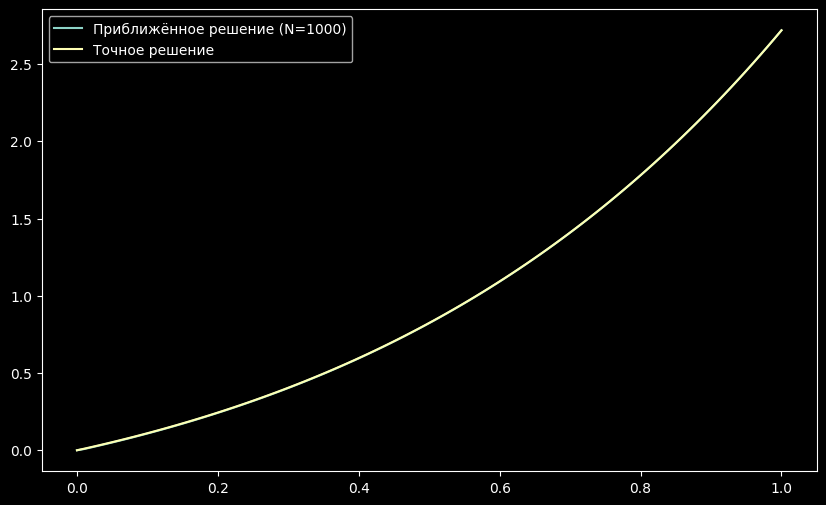

In [32]:
x = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 6))

plt.plot(x, [u_approx(_) for _ in x], label=f"Приближённое решение (N={N})")
plt.plot(x, exact_solution(x), label="Точное решение")

plt.legend()

plt.show()